<a href="https://colab.research.google.com/github/nuprety/FitbitML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Machine Learning Project:** *Using my friend's Fitbit sleep data to predict her sleep scores.*



The Fitbit app allows all the users to get/export lifetime data which contains information on you ever since you started wearing the watch. Exporting data from Fitbit gives a bunch of csv files and some .json files. The .json files provided by the app had the data I actually needed which are minutes asleep, minutes awake and time in bed. So I had to do some research into how I could convert these JSON files to a CSV.
For this I used a bit of a python code which converted all the JSON files into a single csv *"output"* file. I renamed this file to **sleep_stats.csv**. Here is a snapshot of the code I used:


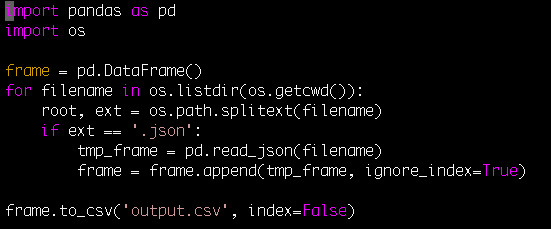

Now, I have two csv files:


1.   sleep_stats.csv
2.   sleep_score.csv




## **Importing the data and libraries I shall be using**

In [95]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [96]:
# Since I am using colab I have to load CSV files to colab. I did so using Github raw link.
sleep_stats_url = 'https://raw.githubusercontent.com/nuprety/FitbitML/main/sleep_stats.csv'
sleep_score_url = 'https://raw.githubusercontent.com/nuprety/FitbitML/main/sleep_score.csv'

# Importing the Fitbit csv data
sleep_stats_df = pd.read_csv(sleep_stats_url)
sleep_scores_df = pd.read_csv(sleep_score_url)

# Read the first few rows of sleep_stats DataFrame
sleep_stats_df.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,20622301608,12/28/18,2018-12-28T01:08:00.000,2018-12-28T09:06:00.000,28680000,0,417,61,6,478,93,stages,0,"{'summary': {'deep': {'count': 5, 'minutes': 1...",True
1,20607238930,12/27/18,2018-12-27T00:29:00.000,2018-12-27T11:16:30.000,38820000,0,554,93,0,647,84,stages,0,"{'summary': {'deep': {'count': 7, 'minutes': 1...",True
2,20595037715,12/26/18,2018-12-25T22:36:00.000,2018-12-26T09:45:00.000,40140000,0,546,123,0,669,92,stages,0,"{'summary': {'deep': {'count': 4, 'minutes': 7...",True
3,20585001204,12/25/18,2018-12-25T03:31:00.000,2018-12-25T10:47:30.000,26160000,0,370,66,0,436,91,stages,0,"{'summary': {'deep': {'count': 4, 'minutes': 7...",True
4,20576792621,12/24/18,2018-12-24T02:34:30.000,2018-12-24T09:06:30.000,23520000,0,342,50,9,392,91,stages,0,"{'summary': {'deep': {'count': 4, 'minutes': 5...",True


In [97]:
# Read the first few rows of sleep_scores DataFrame
sleep_scores_df.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,33302791795,2021-08-09T08:00:30Z,37,18,15,4,38,78,0.234222
1,33292303575,2021-08-08T13:53:30Z,59,18,18,23,57,79,0.180915
2,33292303574,2021-08-07T11:44:30Z,88,22,21,45,104,79,0.129958
3,33263811332,2021-08-06T08:05:30Z,71,21,18,32,56,81,0.187275
4,33252169553,2021-08-05T07:34:00Z,76,21,18,37,78,78,0.124490


In [98]:
# Dropping unwanted Data from sleep_stats DataFrame
sleep_stats_df = sleep_stats_df.drop(['dateOfSleep', 'startTime', 'endTime', 'minutesToFallAsleep', 'minutesAfterWakeup', 'type', 'infoCode', 'levels', 'mainSleep', 'efficiency'], axis =1)
sleep_stats_df.head()

,logId,duration,minutesAsleep,minutesAwake,timeInBed
0,20622301608,28680000,417,61,478
1,20607238930,38820000,554,93,647
2,20595037715,40140000,546,123,669
3,20585001204,26160000,370,66,436
4,20576792621,23520000,342,50,392


In [99]:
# Dropping unwated Data from sleep_scores DataFrame
sleep_scores_df = sleep_scores_df.drop(['timestamp'], axis = 1)
sleep_scores_df.head()

,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,33302791795,37,18,15,4,38,78,0.234222
1,33292303575,59,18,18,23,57,79,0.180915
2,33292303574,88,22,21,45,104,79,0.129958
3,33263811332,71,21,18,32,56,81,0.187275
4,33252169553,76,21,18,37,78,78,0.124490


In [100]:
# renaming a column on a DF first to merge the two DFs
sleep_scores_df = sleep_scores_df.rename(columns={'sleep_log_entry_id': 'logId'})
sleep_scores_df.head()

,logId,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,33302791795,37,18,15,4,38,78,0.234222
1,33292303575,59,18,18,23,57,79,0.180915
2,33292303574,88,22,21,45,104,79,0.129958
3,33263811332,71,21,18,32,56,81,0.187275
4,33252169553,76,21,18,37,78,78,0.124490


In [101]:
# Inner merge on the two DFs
final_df = sleep_stats_df.merge(sleep_scores_df, on = 'logId', how= 'inner')
final_df.head()

,logId,duration,minutesAsleep,minutesAwake,timeInBed,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,23566437526,32400000,455,85,540,78,21,18,39,70,76,0.134545
1,23998259476,32280000,454,84,538,77,22,16,39,86,79,0.157502
2,23998259476,32280000,454,84,538,77,22,16,39,86,79,0.157502
3,23986197478,29520000,436,56,492,83,21,21,41,64,81,0.138071
4,23974829064,29640000,439,55,494,84,23,20,41,107,82,0.148635


In [102]:
# Inspecting the final DF to be used
final_df.shape

(714, 12)

In [103]:
# Inspecting DF
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   logId                  714 non-null    int64  
 1   duration               714 non-null    int64  
 2   minutesAsleep          714 non-null    int64  
 3   minutesAwake           714 non-null    int64  
 4   timeInBed              714 non-null    int64  
 5   overall_score          714 non-null    int64  
 6   composition_score      714 non-null    int64  
 7   revitalization_score   714 non-null    int64  
 8   duration_score         714 non-null    int64  
 9   deep_sleep_in_minutes  714 non-null    int64  
 10  resting_heart_rate     714 non-null    int64  
 11  restlessness           714 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 72.5 KB


# **Visualizing the Data**

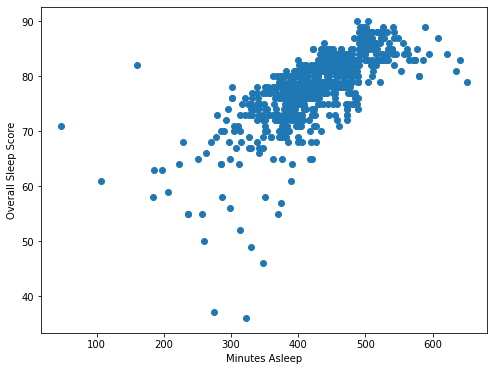

In [104]:
# Scatterplot on the Data
plt.figure(figsize=(8,6))
plt.scatter(x=final_df['minutesAsleep'],y=final_df['overall_score'])
plt.xlabel('Minutes Asleep')
plt.ylabel('Overall Sleep Score')
plt.show()

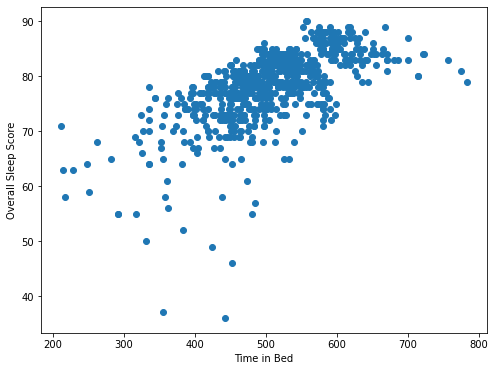

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(x=final_df['timeInBed'],y=final_df['overall_score'])
plt.xlabel('Time in Bed')
plt.ylabel('Overall Sleep Score')
plt.show()

We can see that the Time in Bed and Minutes Asleep have some form of strong positive relationship. This makes sense because the more you spend time in bed and the more you sleep, the better your sleep score is. 

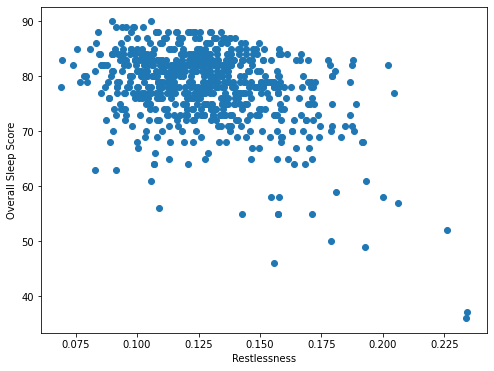

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=final_df['restlessness'],y=final_df['overall_score'])
plt.xlabel('Restlessness')
plt.ylabel('Overall Sleep Score')
plt.show()

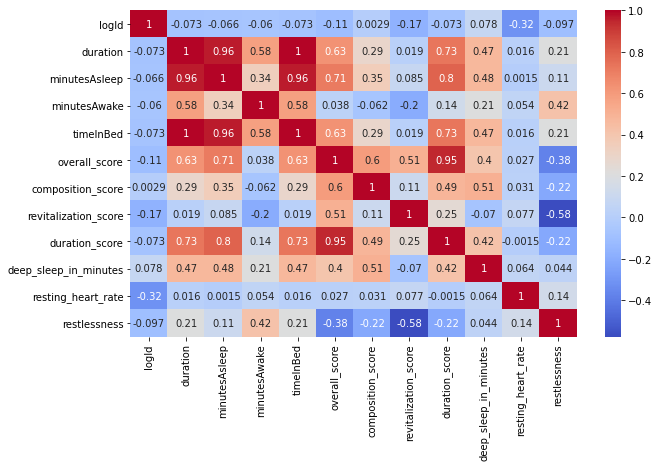

In [107]:
# Inspecting the correlations between the data
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', fmt='.2g')

This correlation map also shows strong positive correlation between **Overall Score** and *Minutes Asleep* & *Time in Bed* i.e 0.71 and 0.63 respectively. However, you see some level of negative correlation between Overall Score and Minutes Awake which makes sense because the more awake you are during the sleep, your sleep score is lesser. This is the same with Resting Heart Rate. 
You can really see how Restlessness is negatively correlated to Overall Score. The more restless you get during the night, the lesser the sleep you get which results in lower score.

# **Preparing Data for Training and Testing**

In [108]:
X = final_df [['duration', 'minutesAsleep', 'minutesAwake', 'timeInBed', 'deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness']]
y = final_df['overall_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size= 0.2)

Training the Model:

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)
#print(y_test)
preds = np.rint(model.predict(X_test)).astype(int)
print(preds)
print(y_test)
mse_preds = float(1/len(y_test)*np.sum((preds-y_test)**2))
print(mse_preds)
acc = np.sum(preds==y_test)/len(y_test)

print('Accuracy of model on the test set is {:.1%}'.format(acc))


[79 75 71 78 92 71 83 76 74 78 88 77 76 78 80 84 78 84 78 89 80 86 80 75
 83 70 74 98 82 71 80 79 76 76 84 84 77 77 80 75 84 78 81 77 76 75 87 76
 70 78 77 82 78 85 65 82 76 82 73 75 87 76 88 75 71 78 83 79 94 78 80 77
 77 77 76 76 80 88 66 86 85 83 79 83 77 66 71 61 78 63 77 75 76 79 70 88
 81 82 67 74 57 77 76 77 82 81 90 74 73 87 81 82 79 73 82 87 88 72 71 69
 80 89 76 88 78 81 74 80 64 77 92 69 76 84 84 84 81 77 85 77 81 75 74]
339    80
142    72
243    73
236    78
712    83
       ..
245    86
303    77
97     83
375    78
484    75
Name: overall_score, Length: 143, dtype: int64
12.328671328671328
Accuracy of model on the test set is 18.9%


VERY LOW ACCURACY which maybe because of how Fitbit actually calculates Sleep Scores.